In [1]:
import numpy as np
import matplotlib.pyplot as plt 

#присваиваем переменные
price = np.array([6, 6.05, 6.1])
volume = np.array([802000, 967000, 1132000])
profit = price * volume
cost = 0.55 * profit
gross_profit = profit - cost 
oper_cost = 0.15 * gross_profit
net_profit = gross_profit - oper_cost 
tax = net_profit * 0.32
cash_flow = net_profit - tax

#считаем CF
cash_flow = np.append(-3400000, cash_flow )

npv = np.npv(0.1,cash_flow)
irr = np.irr(cash_flow)

print(npv)
print(irr)

344796.1010518393
0.15331410149124514


998775.3964872914
4058775.3964872924


(array([  32.,  248.,  745., 1290., 1852., 2248., 2001., 1215.,  332.,
          37.]), array([-679918.55483027, -512049.15969852, -344179.76456676,
        -176310.369435  ,   -8440.97430325,  159428.42082851,
         327297.81596027,  495167.21109202,  663036.60622378,
         830906.00135554,  998775.39648729]), <a list of 10 Patch objects>)

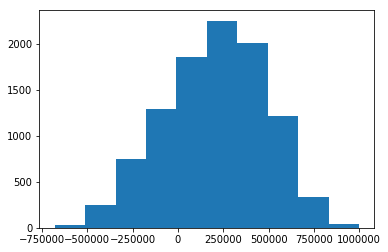

In [9]:
np.random.seed(0)
nSimulatation = 10000

#для price треугольное распределение
price1 = np.random.triangular(5.9, 6, 6.1, size=nSimulatation)
price2 = np.random.triangular(5.95, 6.05, 6.15, size=nSimulatation)
price3 = np.random.triangular(6, 6.1, 6.2, size=nSimulatation)

#для объема продаж нормальное распределение
volume1 = np.random.normal(loc=802000 , scale=25000 , size =nSimulatation)
volume2 = np.random.normal(loc=967000 , scale=30000 , size =nSimulatation)
volume3 = np.random.normal(loc=1132000 , scale=25000 , size =nSimulatation)

#для себестоимости треугольное распределение
cost_per = np.random.triangular(0.5, 0.55, 0.65, size=nSimulatation)

#для операционных издержек нормальное распределение
oper_cost_per = np.random.normal(loc=0.15, scale=0.02 , size =nSimulatation)

#вычисляем
npv =[]
irr =[]

#можно попробовать переделать, чтоб убрать цикл
for i in np.arange(nSimulatation):
    profit1 = price1[i]*volume1[i]
    profit2 = price2[i]*volume2[i]
    profit3 = price3[i]*volume3[i]
    profit = np.array([profit1, profit2, profit3])
    cost = cost_per[i] * profit
    gross_profit = profit - cost
    oper_cost = oper_cost_per[i] * gross_profit
    net_profit = gross_profit - oper_cost 
    tax = net_profit * 0.32
    cash_flow = net_profit - tax
    cash_flow = np.append(-3400000, cash_flow )   
    npvv = np.npv(0.1, cash_flow)
    irrr = np.irr(cash_flow)
    npv.append(npvv)
    irr.append(irrr)
    
#итог
print(max(npv))

#без цикла
npv1 = []
npv1 = {np.npv(0.1, np.append(-340000, 0.68*(1 - oper_cost_per[i])*(1 - cost_per[i])*np.array([price1[i]*volume1[i], price2[i]*volume2[i], price3[i]*volume3[i]]))) for i in np.arange(10000)}     



print(max(npv1))

#графики
plt.hist(npv)

(array([  25.,  193.,  633., 1135., 1714., 2235., 2191., 1410.,  421.,
          43.]),
 array([-0.01209581,  0.01414808,  0.04039196,  0.06663585,  0.09287974,
         0.11912363,  0.14536752,  0.17161141,  0.1978553 ,  0.22409918,
         0.25034307]),
 <a list of 10 Patch objects>)

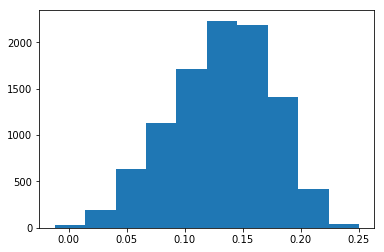

In [3]:
plt.hist(irr)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b8748a5f60>,
 'caps': [<matplotlib.lines.Line2D at 0x1b8748b47f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b8748a59e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b8748b4cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b8748bb4a8>],
 'means': []}

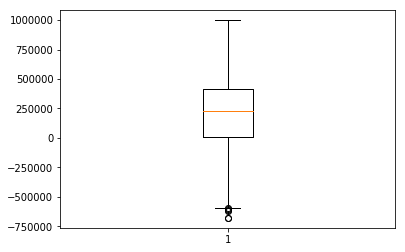

In [4]:
plt.boxplot(npv)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b874905da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b87490e630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b874905860>],
 'medians': [<matplotlib.lines.Line2D at 0x1b87490ee80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b87490ef60>],
 'means': []}

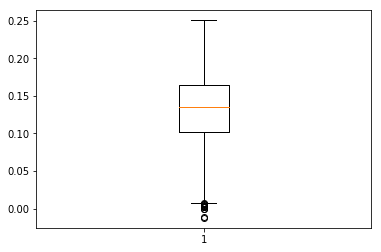

In [5]:
plt.boxplot(irr)

In [6]:
npv = {np.npv(0.1, np.append(-340000, 0.68*(1 - oper_cost_per[i])*(1 - cost_per[i])*np.array([price1[i]*volume1[i], price2[i]*volume2[i], price3[i]*volume3[i]]))) for i in np.arange(nSimulatation)}     

max(npv)

4058775.3964872924

In [7]:
x=5
x = {x + i for i in np.arange(5)}

print(x)

{5, 6, 7, 8, 9}
